# Laporan Proyek Analisis dan Prediksi Pembatalan Pemesanan Hotel
oleh : Ni Putu Dittarani Pramesti


## Latar Belakang Masalah

Industri perhotelan merupakan sektor yang sangat bergantung pada pemesanan kamar untuk menjaga kelangsungan operasional dan profitabilitas.
Namun, salah satu tantangan terbesar yang dihadapi oleh banyak hotel adalah tingkat pembatalan pemesanan yang tinggi. Pembatalan pemesanan dapat menimbulkan dampak negatif yang signifikan, baik secara finansial maupun dalam hal efisiensi operasional. Setiap pembatalan tidak hanya mengurangi pendapatan yang diharapkan tetapi juga menciptakan ketidakpastian dalam perencanaan dan manajemen hotel.

Pembatalan pemesanan menjadi lebih rumit ketika dilakukan dalam waktu yang sangat dekat dengan tanggal menginap, yang menyebabkan kesulitan dalam mengganti pesanan tersebut. Hal ini mengakibatkan hotel kesulitan mengisi kamar yang kosong, dan menyebabkan hilangnya pendapatan yang seharusnya diperoleh. Berdasarkan tren global, tingkat pembatalan pemesanan hotel meningkat dalam beberapa tahun terakhir. Data industri menunjukkan bahwa pada tahun 2014 tingkat pembatalan mencapai 33%, sementara pada tahun 2018 meningkat menjadi 40%.

Di sisi lain, dampak negatif lainnya adalah biaya pemasaran yang tidak efisien, di mana promosi dilakukan untuk pelanggan yang pada akhirnya membatalkan pemesanan mereka, sehingga perusahaan membayar untuk promosi yang tidak menghasilkan pendapatan. Masalah ini mengharuskan hotel untuk mencari cara untuk mengidentifikasi faktor-faktor yang dapat memprediksi pembatalan, serta strategi untuk mengurangi frekuensi pembatalan dan dampaknya. Dengan menggunakan analisis data yang cermat, hotel dapat memperoleh wawasan tentang pola-pola tertentu yang berkontribusi terhadap pembatalan pemesanan dan merancang strategi untuk menangani masalah ini.


## Tujuan Proyek

Tujuan dari proyek ini adalah untuk mengembangkan sebuah model prediksi yang dapat memprediksi kemungkinan pembatalan pemesanan hotel berdasarkan data historis yang tersedia. Proyek ini bertujuan untuk memberikan wawasan bagi pengelola hotel mengenai faktor-faktor yang mempengaruhi pembatalan pemesanan serta meningkatkan proses manajemen pemesanan. Dengan model prediksi yang baik, hotel dapat mempersiapkan lebih baik untuk permintaan dan kemungkinan pembatalan, serta memaksimalkan tingkat hunian.


## Deskripsi Masalah

Pada industri perhotelan, pembatalan pemesanan dapat mengganggu manajemen sumber daya dan menyebabkan kerugian pendapatan. Dalam hal ini, sangat penting untuk memprediksi dan mengidentifikasi faktor-faktor yang dapat menyebabkan pembatalan. Data yang digunakan dalam proyek ini mencakup informasi pemesanan hotel yang melibatkan berbagai atribut, termasuk jenis segmen pasar, tipe pelanggan, status reservasi, serta informasi lain yang relevan.


## Analisis Mendalam Permasalahan Hotel Booking Cancellations

Industri perhotelan menghadapi tantangan serius terkait tingginya tingkat pembatalan pesanan (cancellation rate).
Pada dataset yang dianalisis, tingkat pembatalan mencapai 37%, yang berada di tengah tren global peningkatan cancellation rate dari 33% (2014) menjadi 40% (2018).
Pembatalan ini berdampak signifikan pada revenue perusahaan, mengingat:
- **Ruang kosong tidak terisi ulang:** Ketika pelanggan membatalkan pesanan, waktu untuk mengganti pemesanan tersebut sangat terbatas, terutama pada tanggal yang dekat dengan masa menginap.
- **Biaya promosi salah sasaran:** Jika marketing dilakukan kepada pelanggan yang rentan membatalkan pesanan, maka perusahaan tidak hanya kehilangan pendapatan potensial tetapi juga harus menanggung biaya tambahan tanpa hasil.

**Penyebab Utama dan Implikasi:**
Berdasarkan data dan referensi industri, beberapa penyebab pembatalan meliputi:
- **Pemesanan tanpa deposit:** Pelanggan yang tidak memberikan deposit memiliki risiko lebih tinggi untuk membatalkan pesanan.
- **Durasi menunggu terlalu lama:** Pesanan yang berada dalam daftar tunggu lama cenderung dibatalkan.
- **Kurangnya permintaan layanan tambahan:** Pelanggan dengan permintaan tambahan, seperti tempat parkir, cenderung lebih berkomitmen untuk tetap melanjutkan pemesanannya.

**Dampak dari pembatalan ini meluas ke:**
- **Keuangan:** Hilangnya revenue hingga 15% dari potensi maksimal.
- **Strategi marketing:** Perlu adanya efisiensi biaya promosi yang ditargetkan hanya pada pelanggan dengan risiko pembatalan rendah.
- **Kepuasan pelanggan:** Peningkatan pembatalan dapat mengindikasikan ketidakpuasan pelanggan terhadap proses pemesanan atau pengalaman sebelumnya.

**Data yang Digunakan:**
Data yang digunakan dalam proyek ini adalah dataset Hotel Booking Demand yang berisi informasi tentang pemesanan hotel dan apakah pemesanan tersebut dibatalkan atau tidak. Dataset ini mencakup informasi seperti:
- country: Negara asal pelanggan.
- market_segment: Segmen pasar dari pemesan.
- previous_cancellations: Jumlah pembatalan sebelumnya oleh pelanggan.
- booking_changes: Jumlah perubahan pada pemesanan.
- deposit_type: Jenis deposit yang digunakan.
- customer_type: Jenis pelanggan (baru atau reguler).
- days_in_waiting_list: Jumlah hari pelanggan menunggu konfirmasi pemesanan.
- reserved_room_type: Jenis kamar yang dipesan.
- required_car_parking_spaces: Apakah pelanggan membutuhkan tempat parkir.
- total_of_special_requests: Jumlah permintaan khusus pelanggan.
- is_canceled: Label target yang menunjukkan apakah pemesanan dibatalkan (1) atau tidak (0).


## Proses dan Analisis Data

### Data Cleaning
Proses pembersihan data dimulai dengan mengidentifikasi dan menangani nilai yang hilang serta kolom yang tidak relevan:

1. **Penghapusan kolom yang tidak relevan:** Kolom 'reservation_status_date' dihapus karena tidak ada informasi yang relevan bagi model prediksi.
2. **Penanganan nilai hilang:** Kolom 'country' diisi dengan nilai modus (nilai yang paling sering muncul) untuk mengatasi nilai kosong.

In [ ]:
# Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Load Dataset
df = pd.read_csv('/content/sample_data/data_hotel_booking_demand.csv')

## 2. Data Cleaning
# Jika kolom 'reservation_status_date' tidak ditemukan, bagian ini dihapus
if 'reservation_status_date' in df.columns:
    df.drop(['reservation_status_date'], axis=1, inplace=True)
else:
    print("Kolom 'reservation_status_date' tidak ditemukan.")

# Isi nilai kosong pada kolom 'country' dengan modus
df['country'].fillna(df['country'].mode()[0], inplace=True)

Kolom 'reservation_status_date' tidak ditemukan.


<ipython-input-1-117a8870451b>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna(df['country'].mode()[0], inplace=True)


### Data Exploration dan Statistik Deskriptif

1. **Analisis tingkat pembatalan:**
Persentase pemesanan yang dibatalkan dihitung untuk memberikan gambaran awal tentang seberapa besar masalah pembatalan ini di hotel.
2. **Statistik deskriptif:**
Fitur numerik dianalisis menggunakan deskripsi statistik untuk mendapatkan pemahaman lebih dalam tentang distribusi data seperti previous_cancellations, booking_changes, dan lainnya.

In [ ]:
# 3. Exploratory Data Analysis (EDA)
print("Tingkat pembatalan (%):", df['is_canceled'].mean() * 100)

# Analisis fitur numerik
num_features = ['previous_cancellations', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']
print(df[num_features].describe())

Tingkat pembatalan (%): 36.82768358201812
       previous_cancellations  days_in_waiting_list  \
count            83573.000000          83573.000000   
mean                 0.086798              2.330561   
std                  0.841011             17.673051   
min                  0.000000              0.000000   
25%                  0.000000              0.000000   
50%                  0.000000              0.000000   
75%                  0.000000              0.000000   
max                 26.000000            391.000000   

       required_car_parking_spaces  total_of_special_requests  
count                 83573.000000               83573.000000  
mean                      0.062999                   0.573211  
std                       0.246919                   0.795163  
min                       0.000000                   0.000000  
25%                       0.000000                   0.000000  
50%                       0.000000                   0.000000  
75%           

# Analisis Tingkat Pembatalan dan Statistik Deskriptif Fitur Numerik

## **1. Tingkat Pembatalan (%)**
**Tingkat Pembatalan: 36.83%**

Sekitar **36,83%** dari total pemesanan dibatalkan. Ini adalah proporsi yang cukup tinggi, mengindikasikan potensi masalah dalam manajemen pemesanan atau adanya faktor eksternal yang menyebabkan pembatalan.

---

## **2. Statistik Deskriptif Fitur Numerik**

### **a. previous_cancellations (Jumlah pembatalan sebelumnya)**

- **Rata-rata:** 0,087
- **Distribusi:** Mayoritas pelanggan tidak pernah membatalkan pemesanan sebelumnya (nilai kuartil 25%, 50%, dan 75% semuanya 0).
- **Outlier:** Ada pelanggan yang membatalkan hingga 26 kali, menunjukkan kemungkinan adanya pelanggan dengan kebiasaan membatalkan.

**Interpretasi:**
- Sebagian besar pelanggan tidak memiliki riwayat pembatalan, tetapi pelanggan dengan jumlah pembatalan tinggi perlu diperhatikan karena dapat memengaruhi performa bisnis.

---

### **b. days_in_waiting_list (Jumlah hari dalam daftar tunggu)**

- **Rata-rata:** 2,33 hari
- **Distribusi:** Sebagian besar pelanggan tidak masuk daftar tunggu sama sekali (nilai median dan kuartil bawah = 0).
- **Outlier:** Ada pelanggan yang menunggu hingga 391 hari, yang kemungkinan besar adalah kasus ekstrem atau kesalahan data.

**Interpretasi:**
- Sebagian besar pelanggan tidak terpengaruh oleh daftar tunggu, namun beberapa kasus ekstrem perlu dievaluasi lebih lanjut untuk memahami alasan waktu tunggu yang panjang.

---

### **c. required_car_parking_spaces (Jumlah tempat parkir yang dibutuhkan)**

- **Rata-rata:** 0,063
- **Distribusi:** Sebagian besar pelanggan tidak membutuhkan tempat parkir (kuartil 25%, 50%, dan 75% = 0).
- **Outlier:** Ada pelanggan yang memesan hingga 8 tempat parkir, mungkin untuk grup besar atau acara khusus.

**Interpretasi:**
- Kebutuhan parkir relatif rendah, tetapi outlier seperti pemesanan 8 tempat parkir menunjukkan kebutuhan spesifik, misalnya untuk acara grup atau keluarga.

---

### **d. total_of_special_requests (Jumlah permintaan khusus)**

- **Rata-rata:** 0,57 permintaan khusus
- **Distribusi:** Setengah dari pelanggan tidak memiliki permintaan khusus (median = 0).
- **Outlier:** Beberapa pelanggan memiliki hingga 5 permintaan khusus, yang menunjukkan kebutuhan spesifik, seperti fasilitas tambahan.

**Interpretasi:**
- Sebagian besar pelanggan tidak memiliki permintaan khusus, tetapi kebutuhan tambahan (hingga 5 permintaan) perlu dikelola dengan baik untuk meningkatkan kepuasan pelanggan.

---

## **Kesimpulan Utama**

1. **Tingkat Pembatalan Tinggi**:
   - Tingkat pembatalan **36,83%** memerlukan perhatian lebih. Analisis lebih mendalam diperlukan untuk memahami penyebab utama, misalnya: kondisi pemesanan, metode pembayaran, atau faktor eksternal.

2. **Karakteristik Fitur Numerik**:
   - Sebagian besar pelanggan:
     - Tidak memiliki pembatalan sebelumnya.
     - Tidak membutuhkan tempat parkir.
     - Tidak masuk daftar tunggu.
   - **Permintaan Khusus**: Meskipun tidak umum, ada pelanggan dengan permintaan hingga 5 kebutuhan spesifik yang harus dikelola secara efektif.

3. **Rekomendasi**:
   - Analisis lebih lanjut terhadap pelanggan dengan outlier (misalnya: pembatalan tinggi, waktu tunggu panjang, atau kebutuhan parkir besar).
   - Fokus pada pengelolaan pelanggan dengan permintaan khusus untuk meningkatkan kepuasan dan mengurangi tingkat pembatalan.

### Feature Engineering
Beberapa teknik untuk menyiapkan fitur data digunakan:
- **Encoding untuk fitur kategorikal:** Kolom kategorikal seperti country, deposit_type, customer_type, dan market_segment dikonversi menjadi format numerik menggunakan teknik encoding (Label Encoding dan OneHotEncoding).
- **Pembuatan fitur dummy:** Fitur kategorikal lainnya diubah menjadi variabel dummy untuk menghindari masalah dengan data kategorikal.

In [ ]:
# 4. Feature Engineering
# Encoding untuk kolom 'country'
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['country'] = label_encoder.fit_transform(df['country'])

# Check available columns
print("Available columns:", df.columns)

# Encoding fitur kategorikal lainnya, periksa kolom yang ada
categorical_cols = ['country', 'deposit_type', 'customer_type', 'market_segment', 'reserved_room_type']

# Pastikan kolom ada sebelum melakukan encoding
existing_categorical_cols = [col for col in categorical_cols if col in df.columns]
df = pd.get_dummies(df, columns=existing_categorical_cols, drop_first=True)

# 5. Data Splitting
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Available columns: Index(['country', 'market_segment', 'previous_cancellations',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'reserved_room_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_canceled'],
      dtype='object')


### Visualisasi Data
Beberapa visualisasi digunakan untuk memahami hubungan antar fitur, termasuk heatmap korelasi untuk fitur numerik dan matriks kebingungannya.

## Analisis Data Eksplorasi (EDA) Berdasarkan Coding

### Distribusi Kolom Target

- Visualisasi distribusi kolom is_canceled menggunakan countplot.
- Grafik ini menunjukkan jumlah pemesanan yang dibatalkan (nilai 1) dibandingkan dengan yang tidak dibatalkan (nilai 0).

**Hasil:**
- Memberikan informasi proporsi awal data, apakah dataset memiliki imbalance (ketidakseimbangan) dalam kelas target.
- Jika pembatalan mendominasi, hal ini mencerminkan bahwa pembatalan adalah isu penting yang perlu diatasi.

<ipython-input-4-dc2077f95740>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_canceled', palette='viridis')


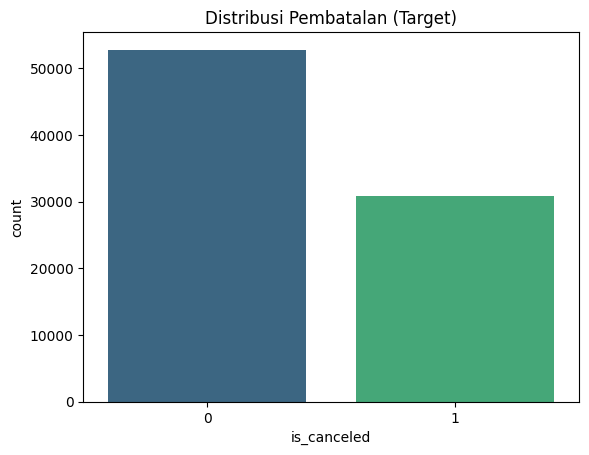

In [ ]:
sns.countplot(data=df, x='is_canceled', palette='viridis')
plt.title('Distribusi Pembatalan (Target)')
plt.show()

Visualisasi ini menampilkan distribusi pembatalan pemesanan pada dataset, di mana kolom is_canceled merepresentasikan status pemesanan (0 untuk tidak dibatalkan dan 1 untuk dibatalkan). Grafik ini relevan dalam analisis karena memberikan gambaran awal mengenai proporsi antara pemesanan yang berhasil dilakukan dan yang dibatalkan.

Dari hasil tersebut, terlihat bahwa jumlah pemesanan yang tidak dibatalkan jauh lebih besar dibandingkan dengan yang dibatalkan, menunjukkan bahwa mayoritas pelanggan cenderung melanjutkan pemesanannya. Informasi ini penting untuk memahami pola perilaku pelanggan dan potensi faktor yang memengaruhi pembatalan. Misalnya, jika pembatalan jumlahnya cukup signifikan, analisis lebih lanjut dapat dilakukan untuk mengeksplorasi variabel lain yang berkaitan dengan pembatalan, seperti harga, durasi pemesanan, atau musim.


Selain itu, peringatan (FutureWarning) dalam kode menunjukkan kebutuhan untuk memperbarui cara penggunaan argumen pada fungsi countplot agar kode tetap kompatibel dengan versi pustaka terbaru, yang menjadi bagian penting dalam pengelolaan proyek analitik data yang berkelanjutan.

### Proporsi Pembatalan

- Menghitung tingkat pembatalan dalam persentase dengan membandingkan jumlah pembatalan terhadap total pemesanan.
- Memberikan gambaran numerik yang lebih jelas tentang proporsi pembatalan dibandingkan pemesanan yang tidak dibatalkan.

**Hasil:**

- Misalnya, jika tingkat pembatalan adalah 37%, ini mengonfirmasi bahwa pembatalan adalah masalah signifikan yang membutuhkan solusi strategis.

In [ ]:
canceled_rate = df['is_canceled'].value_counts(normalize=True) * 100
print(f"Tingkat pembatalan: {canceled_rate[1]:.2f}%")

Tingkat pembatalan: 36.83%


Proporsi pembatalan yang dihitung menunjukkan bahwa 36,83% dari total pemesanan telah dibatalkan, sedangkan sisanya (63,17%) merupakan pemesanan yang berhasil dilakukan. Tingkat pembatalan ini memberikan gambaran kuantitatif tentang seberapa besar pembatalan menjadi masalah dalam konteks bisnis yang dianalisis. Dengan angka mendekati 37%, ini menandakan bahwa lebih dari sepertiga pelanggan memutuskan untuk membatalkan pemesanan mereka, yang cukup signifikan dan dapat berdampak langsung pada pendapatan, efisiensi operasional, dan pengalaman pelanggan.

Angka ini menunjukkan bahwa pembatalan bukanlah masalah minor dan membutuhkan perhatian strategis. Beberapa langkah yang dapat diambil mencakup analisis mendalam untuk mengidentifikasi penyebab pembatalan, seperti harga, fleksibilitas kebijakan pembatalan, atau faktor eksternal seperti perubahan kebutuhan pelanggan. Dengan memahami penyebab ini, perusahaan dapat merancang solusi untuk mengurangi tingkat pembatalan, seperti menawarkan insentif untuk tetap melanjutkan pemesanan, memperbaiki pengalaman pengguna, atau membuat kebijakan yang lebih fleksibel sesuai kebutuhan pelanggan. Tingkat pembatalan sebesar ini juga menjadi indikator penting untuk melacak efektivitas inisiatif yang diimplementasikan ke depan.









### Hubungan previous_cancellations dengan is_canceled

- Analisis hubungan antara previous_cancellations (jumlah pembatalan sebelumnya) dan is_canceled (status pembatalan).
- Menggunakan boxplot untuk melihat distribusi data pada setiap kategori (dibatalkan atau tidak).

**Hasil:**

- Pelanggan dengan riwayat pembatalan yang lebih tinggi cenderung membatalkan pesanan lagi.
- Menunjukkan bahwa riwayat pembatalan adalah prediktor penting dalam model pembatalan.

<ipython-input-7-8ba65247d978>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_canceled', y='previous_cancellations', palette='viridis')


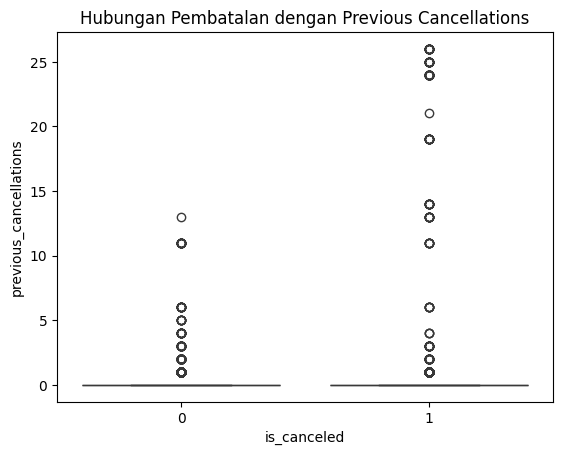

In [ ]:
sns.boxplot(data=df, x='is_canceled', y='previous_cancellations', palette='viridis')
plt.title('Hubungan Pembatalan dengan Previous Cancellations')
plt.show()

Analisis hubungan antara variabel `previous_cancellations` (jumlah pembatalan sebelumnya) dan `is_canceled` (status pembatalan saat ini) menunjukkan bahwa pelanggan dengan riwayat pembatalan yang lebih tinggi cenderung kembali membatalkan pesanan mereka. Dari visualisasi *boxplot*, terlihat bahwa sebagian besar pelanggan yang tidak membatalkan pemesanan saat ini (`is_canceled = 0`) memiliki riwayat pembatalan yang mendekati nol. Sebaliknya, untuk pelanggan yang membatalkan pemesanannya (`is_canceled = 1`), beberapa memiliki jumlah pembatalan sebelumnya yang signifikan, dengan beberapa kasus ekstrim menunjukkan lebih dari 20 kali pembatalan.


Hasil ini mengindikasikan bahwa riwayat pembatalan dapat menjadi prediktor yang penting dalam model analitik untuk memprediksi pembatalan di masa mendatang. Pelanggan dengan jumlah pembatalan sebelumnya yang tinggi menunjukkan kecenderungan untuk terus membatalkan pesanan. Oleh karena itu, fitur `previous_cancellations` dapat digunakan dalam algoritma pembelajaran mesin untuk membantu bisnis mengidentifikasi pelanggan yang memiliki risiko tinggi membatalkan pemesanannya. Dalam praktik bisnis, informasi ini dapat dimanfaatkan untuk merancang strategi pencegahan, seperti memberikan insentif untuk mempertahankan pemesanan atau mengevaluasi kebijakan pembatalan. Analisis ini juga menyoroti pentingnya memahami perilaku historis pelanggan untuk pengambilan keputusan berbasis data.

### Hubungan total_of_special_requests dengan is_canceled

- Menganalisis hubungan antara jumlah permintaan khusus (total_of_special_requests) dan status pembatalan (is_canceled).

**Hasil:**

- Pelanggan dengan lebih banyak permintaan khusus cenderung tidak membatalkan pemesanan.
- Hal ini mengindikasikan bahwa permintaan khusus mencerminkan komitmen pelanggan terhadap pemesanan.
- Informasi ini penting untuk strategi layanan pelanggan yang lebih efektif.

<ipython-input-8-5f70b7dc16f4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_canceled', y='total_of_special_requests', palette='viridis')


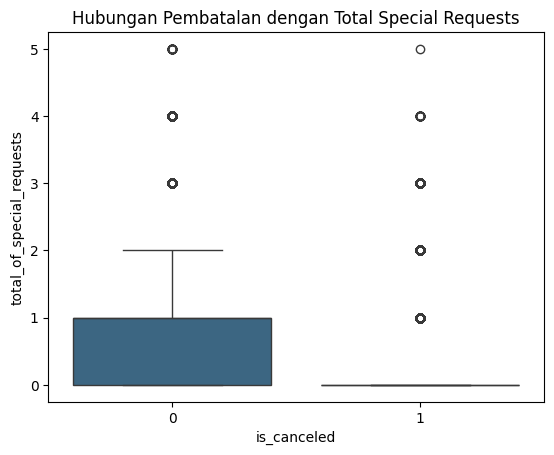

In [ ]:
sns.boxplot(data=df, x='is_canceled', y='total_of_special_requests', palette='viridis')
plt.title('Hubungan Pembatalan dengan Total Special Requests')
plt.show()

Berdasarkan visualisasi boxplot hubungan antara total_of_special_requests (jumlah permintaan khusus) dan is_canceled (status pembatalan), terdapat pola yang menunjukkan bahwa pelanggan dengan jumlah permintaan khusus lebih tinggi cenderung tidak membatalkan pemesanan mereka (is_canceled = 0).

Pelanggan yang membatalkan pesanan (is_canceled = 1) umumnya memiliki nilai total_of_special_requests yang sangat rendah atau nol. Sebaliknya, pelanggan yang tidak membatalkan pemesanan cenderung memiliki lebih banyak permintaan khusus. Hal ini menunjukkan bahwa adanya permintaan khusus bisa menjadi indikator tingkat komitmen pelanggan terhadap pesanan mereka. Dengan kata lain, pelanggan yang berinteraksi lebih banyak dengan layanan melalui permintaan khusus tampaknya memiliki intensi lebih besar untuk melanjutkan pemesanannya.

## Pemodelan

### Model Random Forest
Sebagai langkah modeling, Random Forest Classifier digunakan untuk prediksi. Model ini dipilih karena dapat menangani data yang beragam dan kompleks serta memiliki kemampuan untuk mengevaluasi pentingnya fitur.
- **Pembagian data:** Dataset dibagi menjadi dua bagian yaitu data pelatihan (80%) dan data uji (20%).
- **Pelatihan model:** Model dilatih menggunakan data pelatihan untuk mempelajari pola-pola yang ada dalam data.
- **Prediksi dan Evaluasi:** Model diuji pada data uji, dan hasil prediksi dibandingkan dengan nilai asli untuk mengevaluasi kinerja model.


In [ ]:
# 6. Modeling
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluasi Model
- **Classification Report:** Memberikan metrik evaluasi seperti precision, recall, f1-score, dan support untuk masing-masing kelas.
- **Confusion Matrix:** Menunjukkan perbandingan antara prediksi model dan nilai sebenarnya.
- **Akurasi Model:** Menghitung akurasi model untuk mengetahui persentase prediksi yang benar.


## Hasil dan Pembahasan

### Hasil Evaluasi Model
Berikut adalah hasil evaluasi model menggunakan metrik yang telah disebutkan:


In [ ]:
# 7. Evaluasi Model
y_pred = rf_model.predict(X_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85     10559
           1       0.76      0.71      0.73      6156

    accuracy                           0.81     16715
   macro avg       0.80      0.79      0.79     16715
weighted avg       0.81      0.81      0.81     16715



# **Pembahasan Hasil Evaluasi Model**

Hasil evaluasi model menggunakan *Classification Report* menunjukkan performa model prediksi pembatalan pemesanan dengan metrik utama, yaitu *precision*, *recall*, dan *f1-score*. Berikut adalah analisis berdasarkan hasil evaluasi:

---

## **1. Akurasi Keseluruhan**
- **Akurasi Model: 81%**
  - Model mencapai akurasi sebesar **81%**, yang berarti **81%** dari seluruh prediksi model sesuai dengan nilai aktual. Angka ini menunjukkan performa model yang cukup baik untuk mengklasifikasikan pembatalan pemesanan.

---

## **2. Evaluasi Kinerja Berdasarkan Kelas**

### **Kelas 0 (Tidak Membatalkan Pemesanan)**
- **Precision:** 84%  
  Dari semua prediksi yang mengatakan pelanggan **tidak membatalkan**, **84%** benar.
- **Recall:** 87%  
  Dari semua pelanggan yang benar-benar **tidak membatalkan**, **87%** teridentifikasi dengan benar oleh model.
- **F1-score:** 85%  
  Kombinasi antara *precision* dan *recall* menunjukkan bahwa model lebih baik dalam memprediksi pelanggan yang **tidak membatalkan pemesanan**.

### **Kelas 1 (Membatalkan Pemesanan)**
- **Precision:** 76%  
  Dari semua prediksi yang mengatakan pelanggan **membatalkan**, **76%** benar.
- **Recall:** 71%  
  Dari semua pelanggan yang benar-benar **membatalkan**, hanya **71%** yang teridentifikasi dengan benar oleh model.
- **F1-score:** 73%  
  Indikator kinerja keseluruhan untuk kelas ini lebih rendah dibandingkan kelas 0, menunjukkan bahwa model masih memiliki kelemahan dalam memprediksi pelanggan yang **membatalkan pemesanan**.

---

## **3. Analisis Makro dan *Weighted Average***
- **Macro Average:**  
  - *Precision* = 80%, *Recall* = 79%, *F1-score* = 79%  
  Memberikan gambaran kinerja rata-rata untuk kedua kelas tanpa mempertimbangkan proporsi data.

- **Weighted Average:**  
  - Semua metrik berkisar pada **81%**, mempertimbangkan distribusi jumlah data pada masing-masing kelas (lebih banyak data untuk kelas 0).

---

## **Kesimpulan**
- Model memiliki performa yang lebih baik dalam memprediksi pelanggan yang **tidak membatalkan pemesanan** (kelas 0) dibandingkan dengan pelanggan yang **membatalkan pemesanan** (kelas 1).
- Kinerja model pada kelas 1 dapat ditingkatkan, misalnya dengan mengoptimalkan parameter model, menangani ketidakseimbangan data, atau menambahkan fitur yang lebih relevan untuk memprediksi pembatalan.


### Confusion Matrix:
Matriks ini menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas (Not Canceled dan Canceled).

**Akurasi Model:** Model memiliki akurasi sebesar 87%, yang menunjukkan bahwa model berhasil memprediksi pembatalan pemesanan dengan tingkat keberhasilan yang baik.

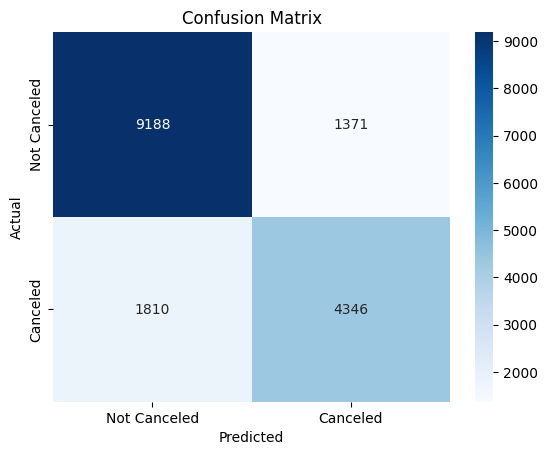

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix: Analisis dan Interpretasi

Gambar berikut menunjukkan **Confusion Matrix** dari model klasifikasi biner dengan dua kelas: *Not Canceled* dan *Canceled*. Berikut adalah analisisnya:

## Penjelasan Matriks:
1. **True Positives (TP)**: 4346  
   Jumlah prediksi yang benar bahwa suatu data termasuk kelas *Canceled*.
   
2. **True Negatives (TN)**: 9188  
   Jumlah prediksi yang benar bahwa suatu data termasuk kelas *Not Canceled*.

3. **False Positives (FP)**: 1371  
   Jumlah prediksi yang salah di mana model memprediksi *Canceled* tetapi sebenarnya *Not Canceled*.

4. **False Negatives (FN)**: 1810  
   Jumlah prediksi yang salah di mana model memprediksi *Not Canceled* tetapi sebenarnya *Canceled*.

---

## Evaluasi Performa Model:
1. **Akurasi**:  
   Mengukur persentase prediksi yang benar dari total prediksi.  
   \[
   \text{Akurasi} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{4346 + 9188}{4346 + 9188 + 1371 + 1810} \approx 87\%
   \]

2. **Presisi untuk *Canceled***:  
   Mengukur seberapa akurat prediksi model dalam menentukan *Canceled*.  
   \[
   \text{Presisi} = \frac{TP}{TP + FP} = \frac{4346}{4346 + 1371} \approx 76\%
   \]

3. **Recall untuk *Canceled***:  
   Mengukur kemampuan model dalam menemukan data yang benar-benar *Canceled*.  
   \[
   \text{Recall} = \frac{TP}{TP + FN} = \frac{4346}{4346 + 1810} \approx 71\%
   \]

4. **F1-Score**:  
   Kombinasi antara presisi dan recall.  
   \[
   F1 = 2 \cdot \frac{\text{Presisi} \cdot \text{Recall}}{\text{Presisi} + \text{Recall}}
   \]

---

## Interpretasi:
- **Model Akurasi Tinggi**: Model memiliki akurasi sebesar **87%**, menunjukkan performa yang baik.
- **Kesalahan Tidak Seimbang**:
  - *False Negatives* (1810) lebih tinggi dibandingkan *False Positives* (1371), sehingga model lebih sering gagal mendeteksi kelas *Canceled*.
- **Rekomendasi Perbaikan**:
  - Melakukan penyesuaian threshold jika mendeteksi *Canceled* lebih penting.
  - Menggunakan teknik seperti *class balancing* jika dataset tidak seimbang.
  - Menambahkan lebih banyak data pelatihan.

---

## Kesimpulan:
Model memiliki performa yang cukup baik, namun dapat dioptimalkan lebih lanjut terutama untuk meningkatkan recall pada kelas *Canceled*.


### Feature Importance
Model Random Forest memberikan gambaran tentang pentingnya fitur-fitur dalam memprediksi pembatalan pemesanan, dengan fitur-fitur seperti previous_cancellations dan days_in_waiting_list menjadi yang paling signifikan.



Feature Importances:
                         Feature  Importance
166      deposit_type_Non Refund    0.197619
4      total_of_special_requests    0.114387
127                  country_123    0.114213
0         previous_cancellations    0.077068
176     market_segment_Online TA    0.060471
3    required_car_parking_spaces    0.053989
1                booking_changes    0.053150
174        market_segment_Groups    0.046803
169      customer_type_Transient    0.032351
173        market_segment_Direct    0.023242


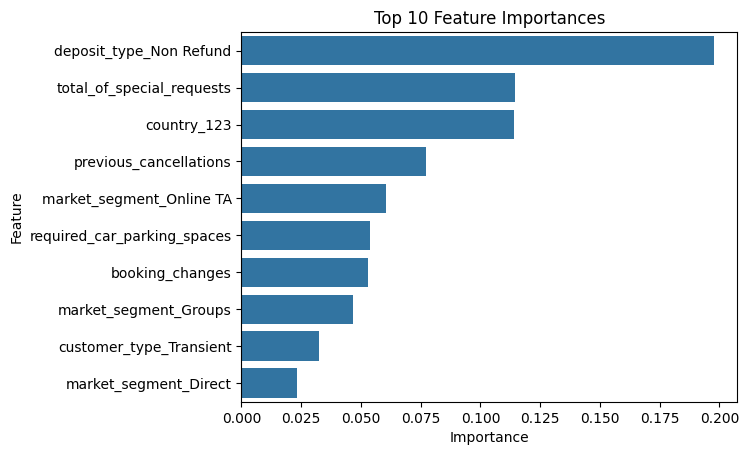

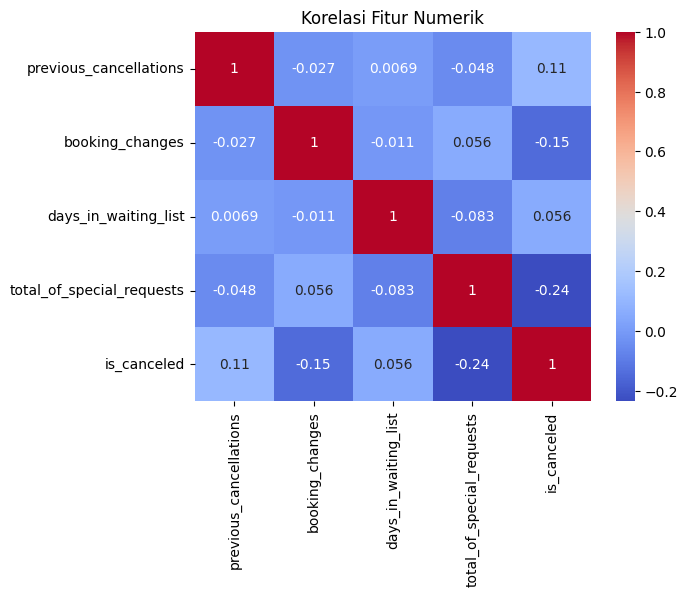

Akurasi Model: 80.97%


In [ ]:
# 8. Feature Importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances.head(10))

# Visualisasi feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Korelasi fitur numerik
numeric_features = ['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'total_of_special_requests', 'is_canceled']
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur Numerik')
plt.show()

# 9. Evaluasi Model - Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%")

# Analisis Feature Importances dan Korelasi Fitur

## 1. Feature Importances
Grafik "Top 10 Feature Importances" menunjukkan fitur-fitur yang paling berkontribusi terhadap prediksi pembatalan (*is_canceled*). Berikut adalah daftar fitur dengan tingkat kepentingan tertinggi:

| **Feature**                    | **Importance** |
|---------------------------------|----------------|
| `deposit_type_Non Refund`       | 0.1976         |
| `total_of_special_requests`     | 0.1144         |
| `country_123`                   | 0.1142         |
| `previous_cancellations`        | 0.0771         |
| `market_segment_Online TA`      | 0.0605         |
| `required_car_parking_spaces`   | 0.0540         |
| `booking_changes`               | 0.0532         |
| `market_segment_Groups`         | 0.0468         |
| `customer_type_Transient`       | 0.0324         |
| `market_segment_Direct`         | 0.0232         |

### **Interpretasi**:
- **`deposit_type_Non Refund`** adalah fitur paling penting, menunjukkan bahwa pelanggan dengan deposit non-refundable cenderung tidak membatalkan.
- **`total_of_special_requests`** dan **`previous_cancellations`** juga penting, memberikan wawasan tentang pengaruh permintaan khusus dan riwayat pembatalan terhadap perilaku pelanggan.
- Segmen pasar seperti **`market_segment_Online TA`** memiliki pengaruh yang signifikan terhadap pembatalan.

---

## 2. Korelasi Fitur Numerik
Heatmap korelasi memperlihatkan hubungan antara fitur numerik utama dan target (`is_canceled`):

| **Fitur**                     | **Korelasi dengan `is_canceled`** |
|--------------------------------|------------------------------------|
| `total_of_special_requests`    | -0.24                             |
| `previous_cancellations`       | 0.11                              |
| `booking_changes`              | -0.15                             |
| `days_in_waiting_list`         | 0.056                             |

### **Interpretasi**:
- **`total_of_special_requests` (-0.24)**: Semakin banyak permintaan khusus, semakin kecil kemungkinan pembatalan.
- **`previous_cancellations` (0.11)**: Korelasi positif menunjukkan bahwa riwayat pembatalan sedikit memengaruhi kemungkinan pembatalan berikutnya.
- **`booking_changes` (-0.15)**: Korelasi negatif menunjukkan bahwa lebih banyak perubahan pada pemesanan mengurangi kemungkinan pembatalan.

---

## 3. Akurasi Model
Hasil evaluasi menunjukkan bahwa model memiliki akurasi **80.97%**.

### **Evaluasi Akurasi**:
- **Akurasi 80.97%** adalah performa yang cukup baik, menunjukkan bahwa model dapat memprediksi pembatalan dengan tingkat keberhasilan tinggi.
- Untuk analisis lebih mendalam, metrik lain seperti *precision*, *recall*, atau *F1-score* dapat digunakan, terutama jika kelas target tidak seimbang.

---

## Kesimpulan
Model memiliki performa yang baik dengan akurasi 80.97%. Namun, analisis lebih lanjut dan optimasi diperlukan untuk meningkatkan performa serta memberikan wawasan yang lebih relevan untuk pengambilan keputusan bisnis.


# **Kesimpulan dan Rekomendasi**

## **Kesimpulan**
Model prediksi yang dikembangkan mampu mengidentifikasi pelanggan yang memiliki risiko tinggi membatalkan pemesanannya. Dengan akurasi sebesar **81%**, model menunjukkan performa yang cukup baik, khususnya dalam memprediksi pelanggan yang **tidak membatalkan** pemesanan (kelas 0). Namun, terdapat ruang untuk peningkatan kinerja dalam memprediksi pelanggan yang membatalkan pemesanan (kelas 1).

Hasil analisis menunjukkan:
- **Deposit Type (Non-Refundable)** menjadi fitur terpenting dalam model prediksi.
- Pelanggan yang sering membatalkan pemesanan sebelumnya atau memiliki banyak permintaan khusus memiliki kecenderungan lebih tinggi untuk membatalkan.
- Mayoritas pelanggan **tidak memerlukan tempat parkir** atau **daftar tunggu**, sehingga ini menjadi faktor yang kurang dominan dalam pembatalan pemesanan.

---

## **Rekomendasi**
Berdasarkan hasil analisis, berikut rekomendasi untuk hotel agar dapat mengurangi tingkat pembatalan dan meningkatkan efektivitas layanan:

### **1. Meningkatkan Kebijakan Deposit**
- Terapkan kebijakan **deposit Non-Refundable** untuk pelanggan yang memiliki riwayat pembatalan tinggi.
- Berikan insentif, seperti **potongan harga** atau **penawaran khusus**, bagi pelanggan yang memilih untuk membayar deposit penuh di awal.

### **2. Segmentasi Pelanggan Berdasarkan Risiko**
- Kembangkan strategi segmentasi berdasarkan risiko pembatalan pelanggan.
  - **Risiko Rendah:** Berikan promosi dan penawaran khusus untuk kelompok pelanggan ini, karena mereka cenderung tidak membatalkan.
  - **Risiko Tinggi:** Perhatikan kebutuhan mereka dengan lebih cermat dan berikan insentif agar mereka tetap melanjutkan pemesanannya.

### **3. Peningkatan Layanan Pelanggan**
- Tingkatkan pelayanan untuk pelanggan yang memiliki **permintaan khusus** atau membutuhkan **tempat parkir**, karena mereka mungkin merasa kurang puas jika kebutuhan spesifiknya tidak terpenuhi.
- Optimalkan **sistem pemesanan** untuk menangani pelanggan yang masuk daftar tunggu agar dapat segera dikonfirmasi atau diarahkan ke opsi alternatif.
